In [1]:
%matplotlib inline

from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


    

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [5]:
cannonage=pd.read_pickle('../CannonDR16_cut.pkl')
APOGEE_age=readfits('../apogee_astroNN-DR16-v1.fits')

In [6]:
cmage=pd.merge(APOGEE_age[['age','APOGEE_ID']],cannonage,left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')

# Compare ages from astroNN and Cannon for OC and GC

In [4]:
OC=readfits('occam_member-DR16.fits')
GC=readfits('APOGEE-globclust.fits')

In [ ]:
cmage_OC=pd.merge(OC,cmage,left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')
cmage_GC=pd.merge(GC,cmage,left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')

(0, 15)

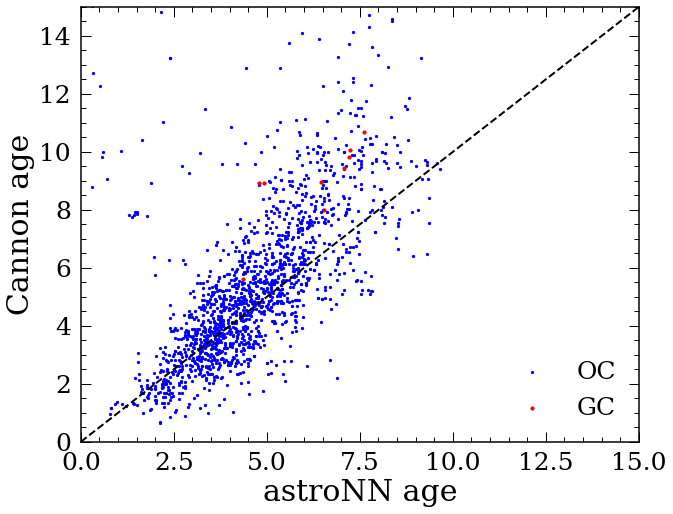

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(cmage_OC['age'],cmage_OC['Age'],c='b',s=5,label='OC')
plt.scatter(cmage_GC['age'],cmage_GC['Age'],c='R',s=10,label='GC')
plt.plot([0,15],[0,15],'k--')
plt.xlabel('astroNN age')
plt.ylabel('Cannon age')
plt.legend()
plt.xlim([0,15])
plt.ylim([0,15])

In [18]:
cmage_GC.CLUSTER.unique()

array(['M71'], dtype=object)

# Check starhourse distance (I am using starhourse distances)

In [20]:
Rest=readfits('apogee_starhorse-DR16-v1.fits')

In [33]:
distcomp=pd.merge(cannonage,Rest[['APOGEE_ID','dist95']],left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')

In [35]:
def convd2R(phi):
    return phi/180*np.pi
distcomp['X_SH'] = distcomp.dist95 * np.cos(convd2R(distcomp.GLAT)) * np.cos(convd2R(distcomp.GLON)) / 1000.
distcomp['Y_SH'] = -distcomp.dist95 * np.sin(convd2R(distcomp.GLON)) * np.cos(convd2R(distcomp.GLAT))/ 1000.
distcomp['z_SH'] = distcomp.dist95 * np.sin(convd2R(distcomp.GLAT))/ 1000.
distcomp['R_SH'] = np.sqrt(np.power(distcomp.X - 8.2,2.) + np.power(distcomp.Y,2.))

Text(0, 0.5, 'R from starhourse')

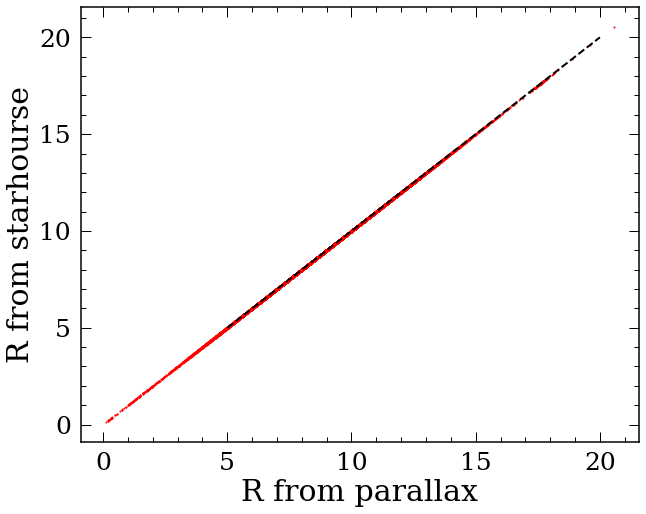

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(distcomp['R'],distcomp['R_SH'],c='r',s=1)
plt.plot([5,20],[5,20],'k--')
plt.xlabel('R from parallax')
plt.ylabel('R from starhourse')

# Dynamics

In [38]:
actions=readfits('allStar-r13-l33-58932beta-actions-lucy.fits')

In [40]:
actions

,APOGEE_ID,x,y,z,v_x,v_y,v_z,E,L_x,L_y,...,J_phi,J_z,theta_R,theta_phi,theta_z,Om_R,Om_phi,Om_z,R,Rg
0,2M00000002+7417074,-10.050303,3.425714,0.844877,36.174026,198.349290,6.520734,-121415.316601,-0.197738,-0.901516,...,-2117.392328,13.042132,2.298417,2.965601,1.163711,33.022717,-24.217920,42.726146,10.085753,9.397502
1,2M00000019-1924498,-8.096279,0.052492,-0.213109,0.265314,229.157851,-16.905077,-130026.549120,0.216906,0.088007,...,-1855.339898,3.739135,2.566558,3.142194,3.787131,40.158804,-29.399853,65.693489,8.099084,8.017780
2,2M00000032+5737103,-8.369559,0.505926,-0.023533,24.679013,227.843368,1.159512,-128403.836842,-0.012155,0.002854,...,-1919.434192,0.028788,4.501646,3.030142,5.401505,38.708611,-28.425376,73.364871,8.369592,8.309902
3,2M00000068+5710233,-8.404038,0.578611,-0.034818,11.154465,226.982192,-32.727874,-128057.375245,0.372835,0.246694,...,-1914.021172,9.025324,2.086771,3.094241,3.163144,38.395083,-28.118365,54.929231,8.404111,8.289395
4,2M00000133+5721163,-10.601596,5.078183,-0.449839,82.277073,168.025003,31.829101,-118963.201023,0.229413,0.845911,...,-2199.151307,20.631184,3.209266,2.681687,5.957570,31.196773,-22.856827,36.721059,10.611136,9.809020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539099,2M23595837+5700444,-10.140508,4.147485,-0.390447,109.010065,213.884335,11.221004,-111672.411754,0.162371,0.618985,...,-2621.013358,4.674526,5.610522,2.658389,5.488394,26.242607,-19.394348,36.821467,10.148022,11.616533
539100,2M23595886+5726058,-9.257964,2.325398,-0.191100,51.608749,194.031839,-19.037863,-127420.771796,0.191920,0.155347,...,-1916.350619,4.574567,3.217376,2.882886,3.600232,37.902364,-27.755895,59.831007,9.259936,8.385534
539101,2M23595886-2009435,-8.060738,0.112012,-0.506672,-9.961397,230.828319,8.779451,-129547.078978,0.077576,0.071941,...,-1859.530792,8.440340,1.445318,3.186922,4.963209,39.722442,-29.041891,57.961529,8.076646,8.060696
539102,2M23595921+5609479,-9.619351,3.099448,-0.336594,61.441061,208.789363,34.594109,-120423.027797,0.138379,0.841343,...,-2198.851422,17.783264,2.712770,2.852840,5.925518,32.201478,-23.664755,39.043387,9.625238,9.676007


In [42]:
cols=['J_R', 'J_phi', 'J_z', 'ecc', 'Rg','APOGEE_ID']

In [45]:
df_CM=pd.merge(cannonage,actions[cols],left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')


In [58]:
#df_CM.loc[abs(df_CM['J_R'])<500]['J_R'].hist(bins=100)
df_CM=df_CM.loc[abs(df_CM['J_R'])<500]

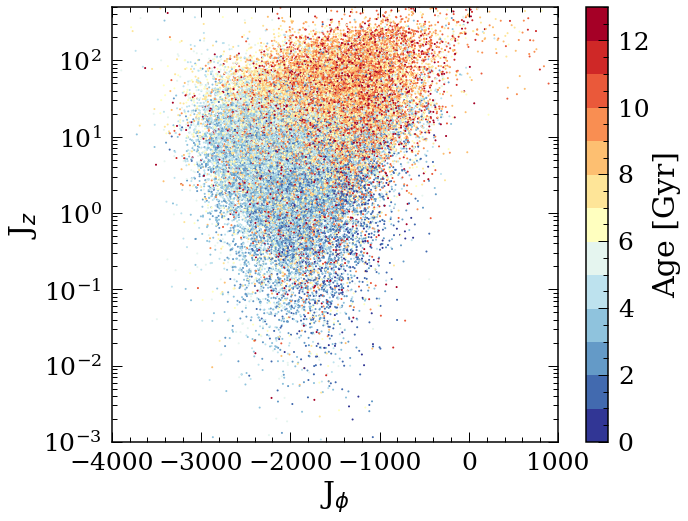

In [76]:
plt.figure(figsize=(10,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)
plt.scatter(df_CM['J_phi'],df_CM['J_z'],c=df_CM['Age'],s=1, vmin=0,vmax=13,cmap=cmap1)
plt.xlim([-4000,1000])
plt.ylim([0.001,500])
plt.xlabel('J$_ϕ$')
plt.ylabel('J$_z$')
plt.yscale('log')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')

Text(0.5, 1.0, 'high-α disk')

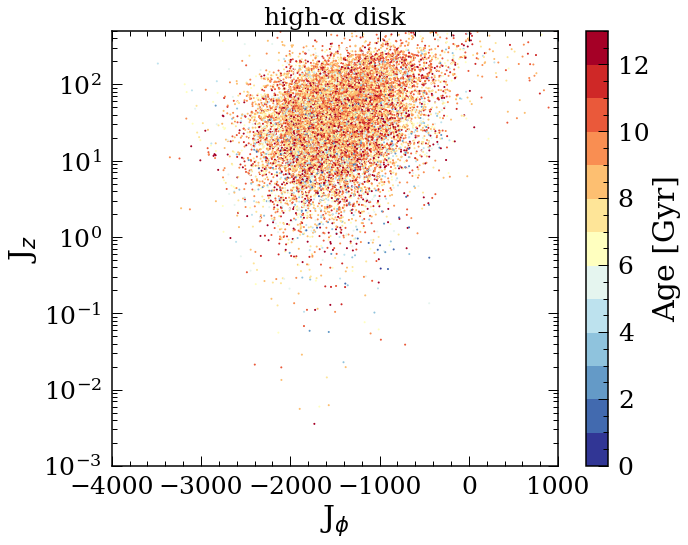

In [79]:
plt.figure(figsize=(10,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)
plt.scatter(df_CM.loc[df_CM['hi_low_line']==1]['J_phi'],
            df_CM.loc[df_CM['hi_low_line']==1]['J_z'],
            c=df_CM.loc[df_CM['hi_low_line']==1]['Age'],s=1, vmin=0,vmax=13,cmap=cmap1)
plt.xlim([-4000,1000])
plt.ylim([0.001,500])
plt.xlabel('J$_ϕ$')
plt.ylabel('J$_z$')
plt.yscale('log')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')
plt.title('high-α disk',fontsize=25)

Text(0.5, 1.0, 'low-α disk')

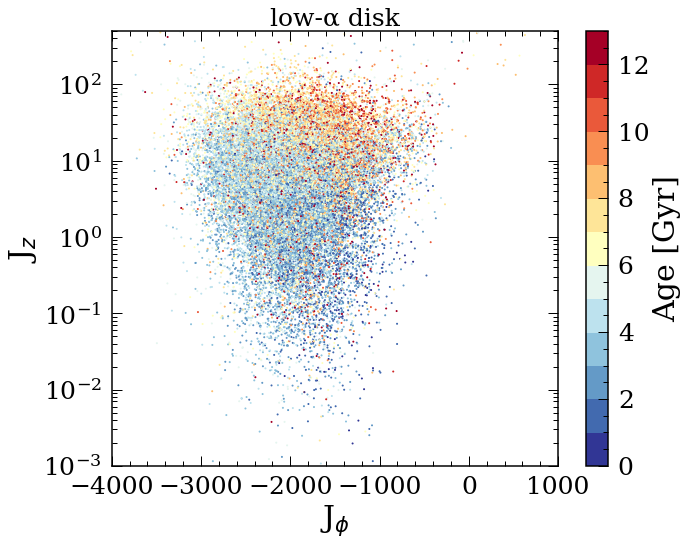

In [80]:
plt.figure(figsize=(10,8))
cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)
plt.scatter(df_CM.loc[df_CM['hi_low_line']==0]['J_phi'],
            df_CM.loc[df_CM['hi_low_line']==0]['J_z'],
            c=df_CM.loc[df_CM['hi_low_line']==0]['Age'],s=1, vmin=0,vmax=13,cmap=cmap1)
plt.xlim([-4000,1000])
plt.ylim([0.001,500])
plt.xlabel('J$_ϕ$')
plt.ylabel('J$_z$')
plt.yscale('log')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')
plt.title('low-α disk',fontsize=25)

100%|██████████| 9/9 [00:00<00:00, 81.00it/s]


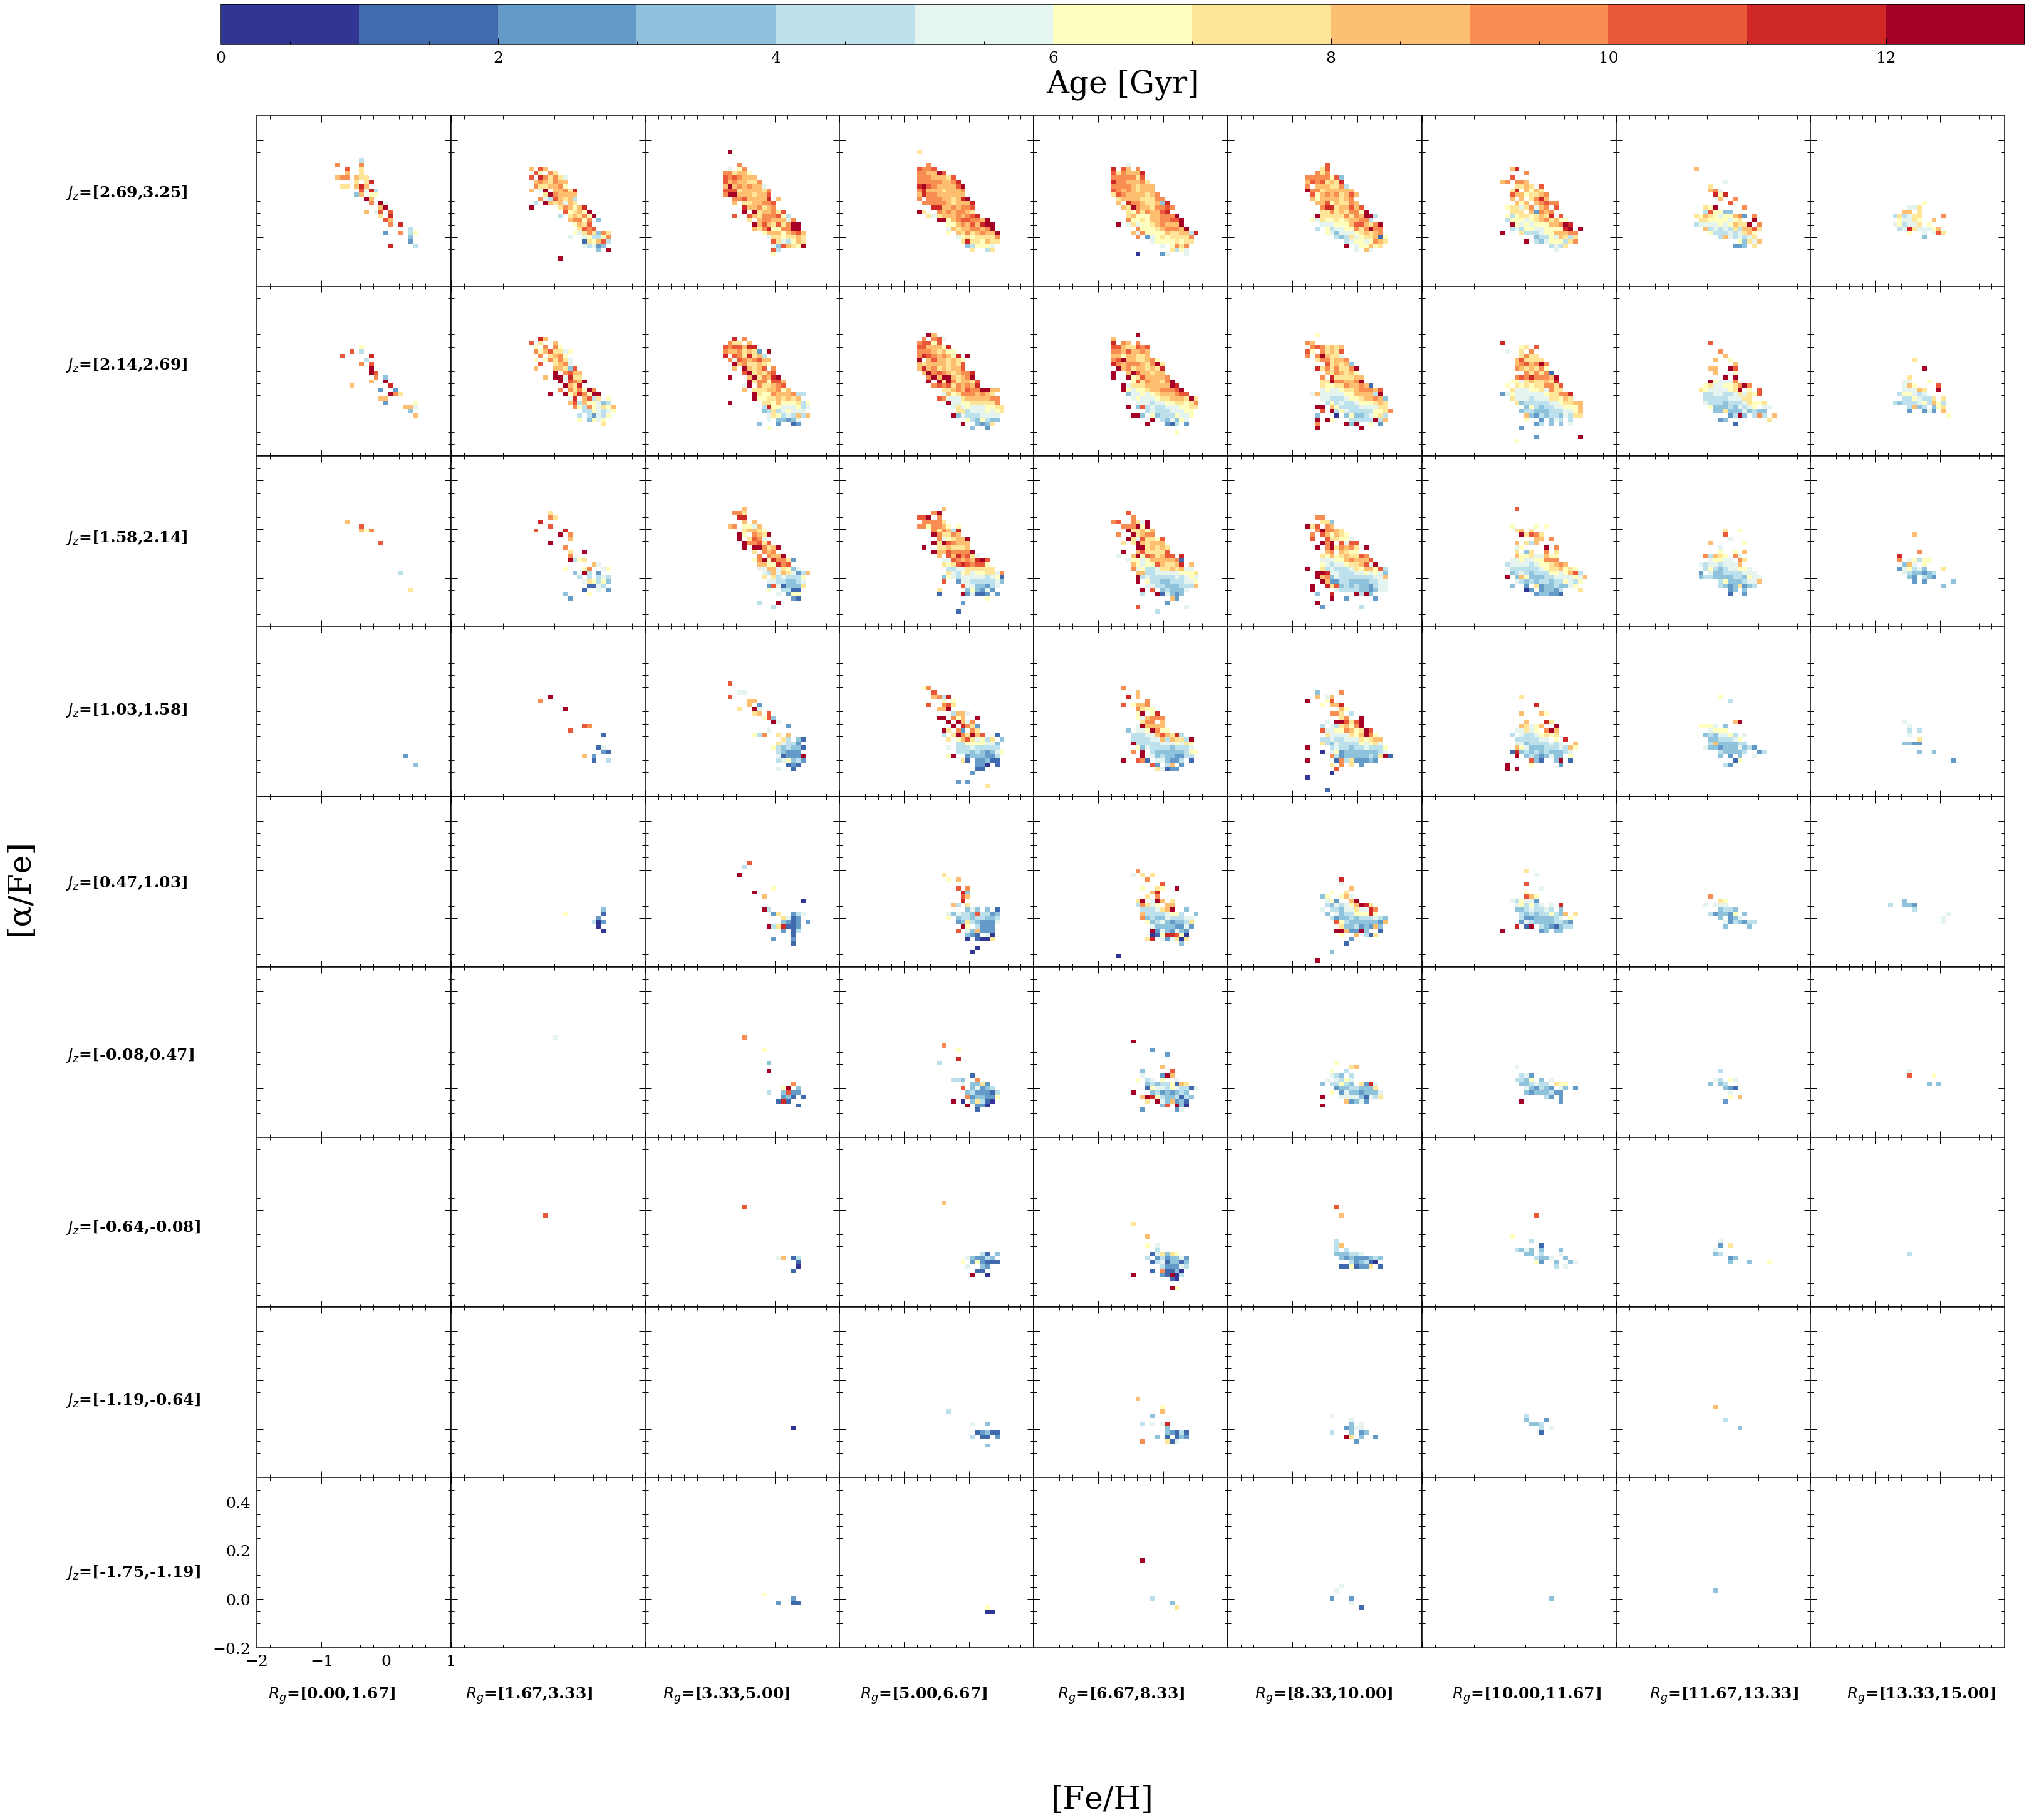

In [101]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(0,15,10)
alpha=np.linspace(2,-3,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 =-2,1,-0.2,0.5
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[np.log10(df_CM['J_z'])>alpha[i+1]]
    df_all=df_all.loc[np.log10(df_CM['J_z'])<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['Rg'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['Rg'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['M_H'].values,df_all_z['ALPHA_M'].values,
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        count=count+1
        if i!=len(alpha)-2 or j!=0:
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, '[α/Fe]', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.05, '[Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=50)

for i in range(10-1):
    fig.text(0.04, 0.16+0.085*i, '$J_z$=[%.2f,%.2f]'%(0.3-alpha[i]-0.05,0.3-alpha[i+1]-0.05), rotation='horizontal',
             fontsize=25, fontweight='bold')
    fig.text(0.13+0.0875*i, 0.1, '$R_g$=[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=25, fontweight='bold')
        


plt.savefig('Jz_Rgplot.png')

100%|██████████| 9/9 [00:00<00:00, 44.32it/s]


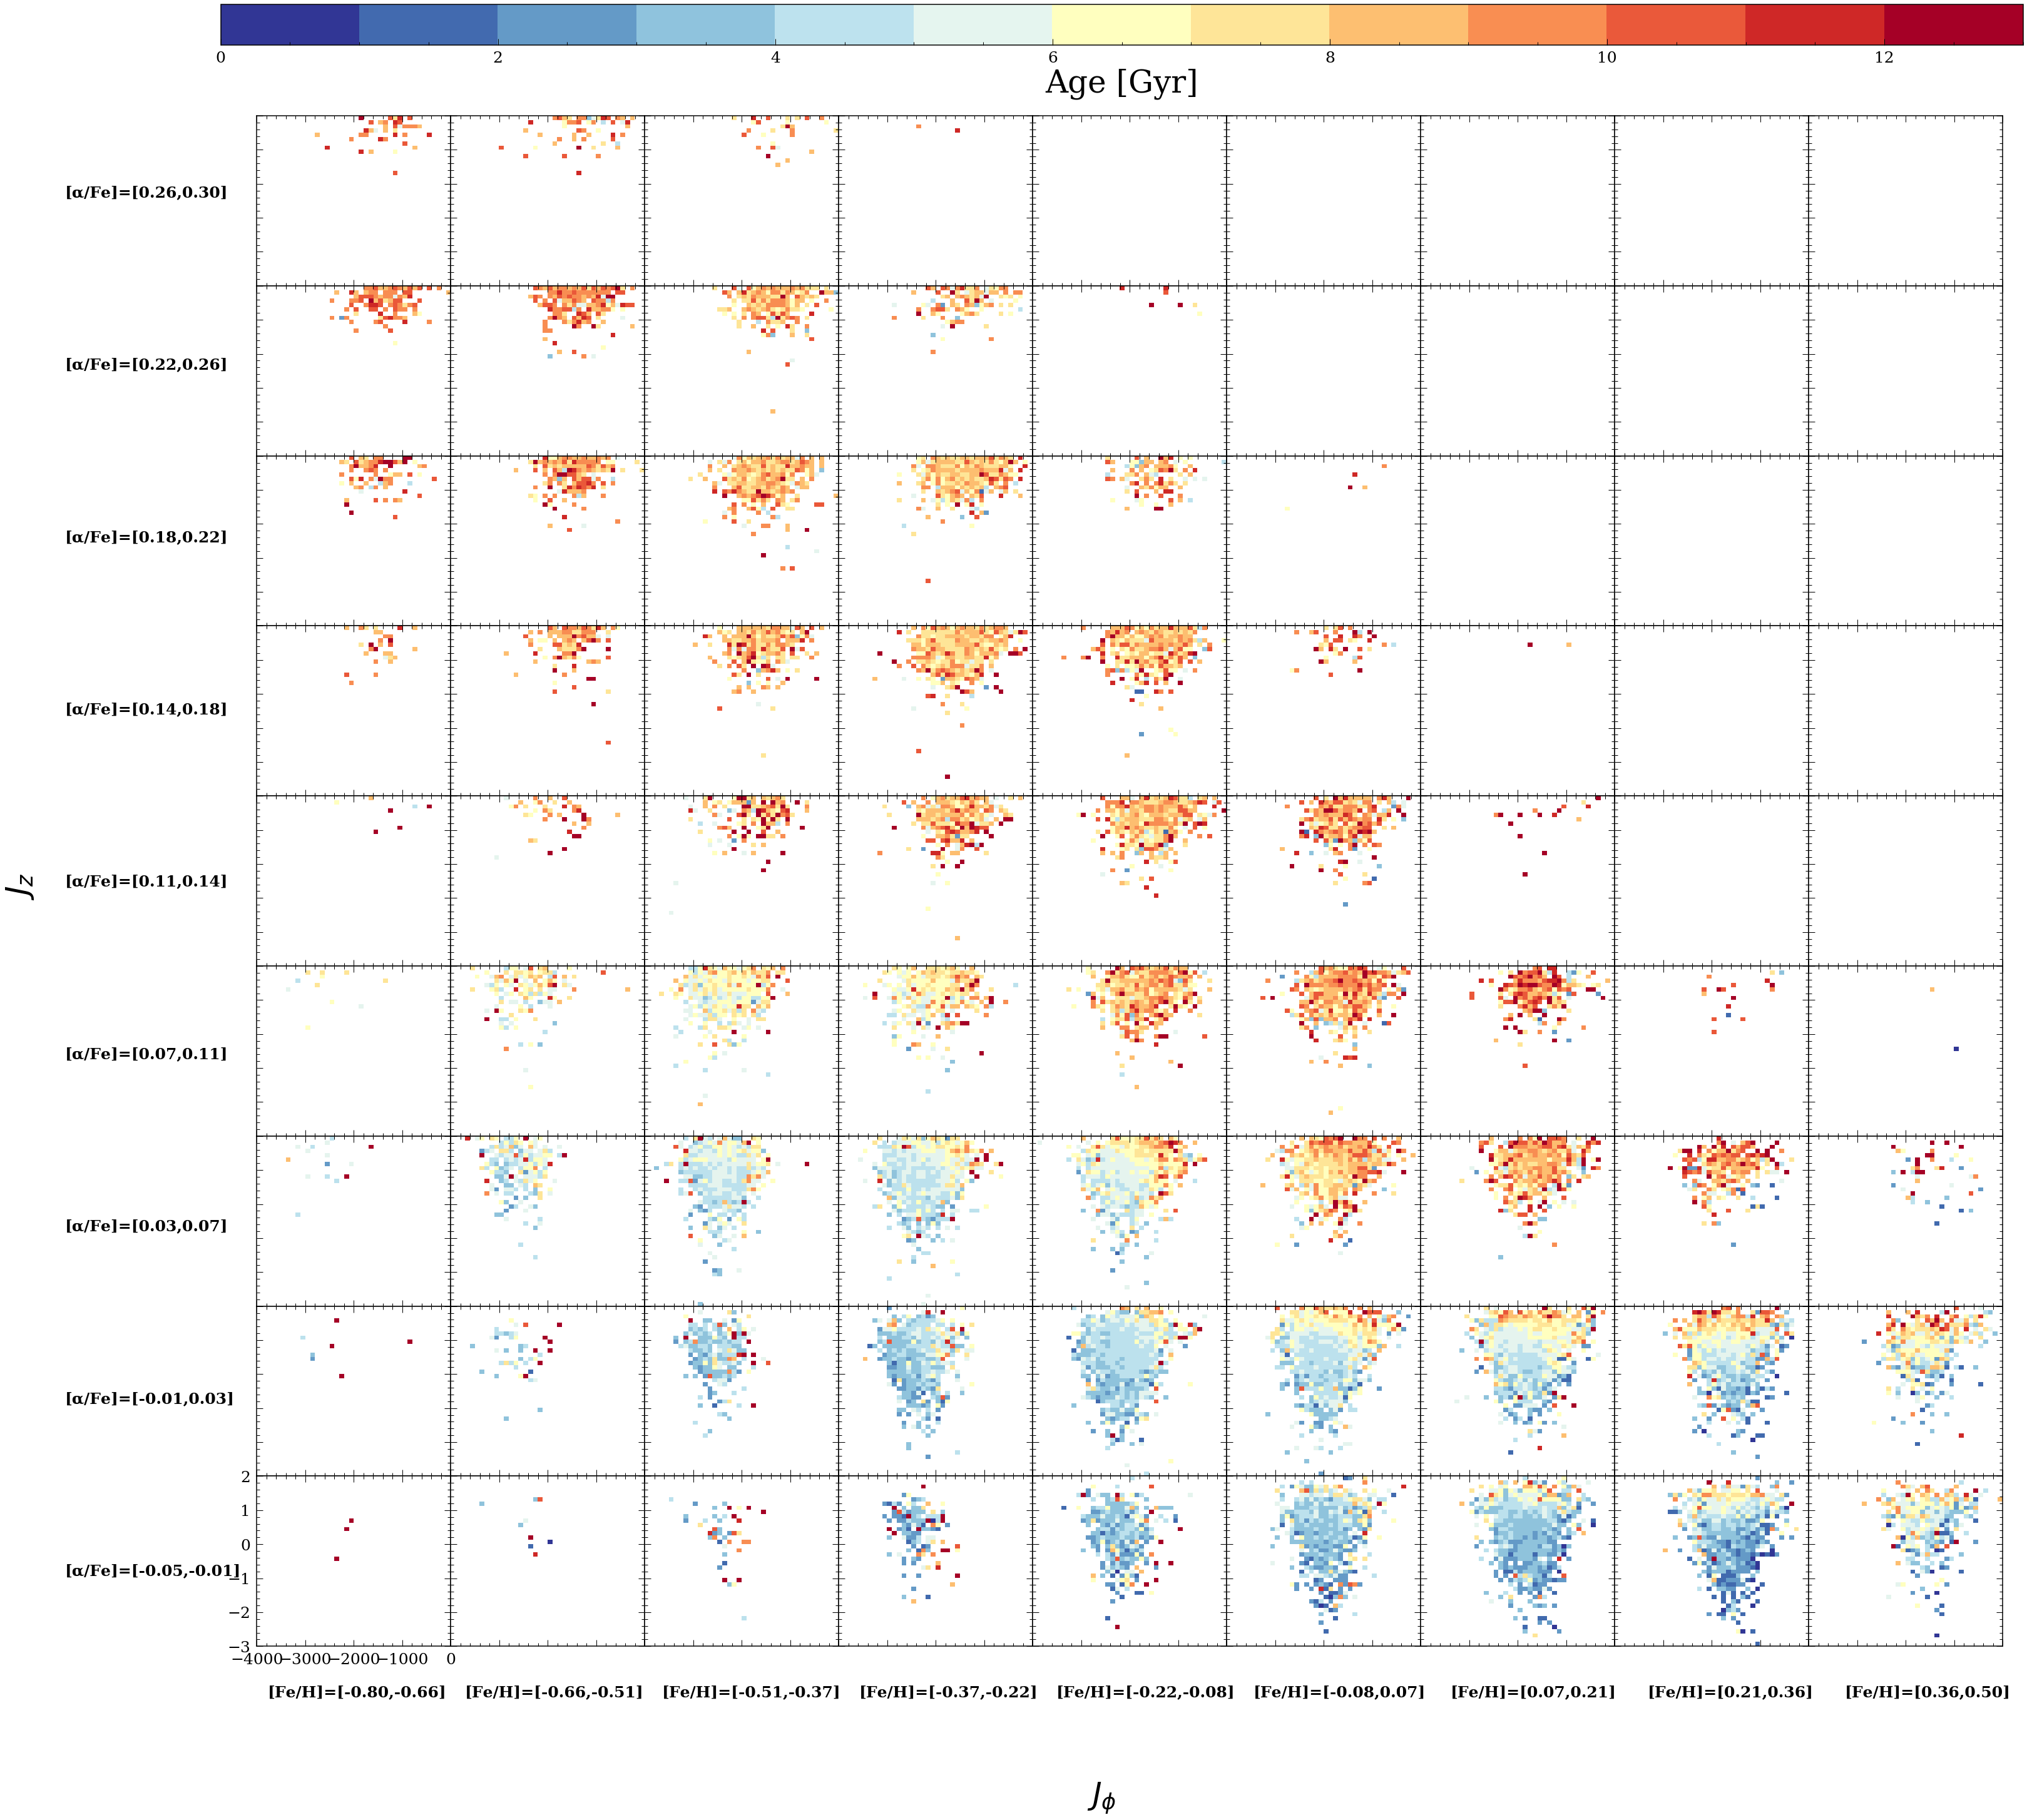

In [102]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = -4000,0,-3,2
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['J_phi'].values,np.log10(df_all_z['J_z'].values),
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        count=count+1
        if i!=len(alpha)-2 or j!=0:
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, '$J_z$', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.05, '$J_ϕ$', ha='center', va='center', rotation='horizontal',fontsize=50)

for i in range(10-1):
    fig.text(0.04, 0.16+0.085*i, '[α/Fe]=[%.2f,%.2f]'%(0.3-alpha[i]-0.05,0.3-alpha[i+1]-0.05), rotation='horizontal',
             fontsize=25, fontweight='bold')
    fig.text(0.13+0.0875*i, 0.1, '[Fe/H]=[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=25, fontweight='bold')
        


plt.savefig('action.png')
